# parameter tuning in XgBoost with cross validation

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('./processeddata/traindata_no_text_processing.csv')

In [3]:
x = train.iloc[:,0:train.shape[1]-1]
y = train.iloc[:,-1]

In [4]:
## removing title and item_id have already added title features in training set 
x.drop('title',axis = 1, inplace= True)
x.drop('item_id',axis = 1, inplace= True)

In [5]:
x.head()

,category_name,city,image_top_1,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,user_id,user_type,Weekday,Weekend_no,day,image_status,no_of_words_description,no_of_words_title,no_of_chars_title,no_of_chars_description
0,42,462,12,2,249,112,1217,4,400.0,19,884270,1,1,13,28,1,7,3,38,108
1,22,1314,2722,19,122,112,1217,2,3000.0,17,227908,1,6,12,26,1,7,3,32,73
2,2,1290,2259,9,84,112,1217,0,4000.0,16,576261,1,0,12,20,1,17,2,14,168
3,42,950,2837,286,38,112,1217,4,2200.0,21,755087,0,5,12,25,1,3,1,20,38
4,0,318,1407,3,278,124,46,6,40000.0,4,944363,1,3,11,16,1,4,3,17,44


In [6]:
test = pd.read_csv('./processeddata/testdata_no_text_processing.csv')

In [7]:
test.drop('title',axis = 1, inplace= True)
test.drop('item_id',axis = 1, inplace= True)

In [8]:
import xgboost as xgb


true_test = xgb.DMatrix(test)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
### vvimp https://cambridgespark.com/content/tutorials/hyperparameter-tuning-in-xgboost/index.html

xgdmat=xgb.DMatrix(X_train,y_train)

In [11]:
xgdmat_test = xgb.DMatrix(X_test,y_test)

In [12]:
import xgboost as xgb

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,6)
    for min_child_weight in range(1,5)
]

In [13]:
params = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1.0,
 'eta': 0.3,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 6,
 'missing': 9999999999,
 'n_estimators': 9,
 'nthread': 4,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 1301,
 'silent': 1,
 'subsample': 0.7}

In [14]:
%%time
num_boost_round = 529

model = xgb.train(
    params,
    xgdmat,
    num_boost_round=num_boost_round,
    evals=[(xgdmat_test, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:0.413216
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.38574
[2]	Test-rmse:0.361916
[3]	Test-rmse:0.341345
[4]	Test-rmse:0.323662
[5]	Test-rmse:0.308596
[6]	Test-rmse:0.295784
[7]	Test-rmse:0.285009
[8]	Test-rmse:0.275862
[9]	Test-rmse:0.268163
[10]	Test-rmse:0.26176
[11]	Test-rmse:0.256443
[12]	Test-rmse:0.251983
[13]	Test-rmse:0.24828
[14]	Test-rmse:0.245227
[15]	Test-rmse:0.24248
[16]	Test-rmse:0.240221
[17]	Test-rmse:0.238481
[18]	Test-rmse:0.236936
[19]	Test-rmse:0.235685
[20]	Test-rmse:0.234642
[21]	Test-rmse:0.233757
[22]	Test-rmse:0.233016
[23]	Test-rmse:0.2324
[24]	Test-rmse:0.231859
[25]	Test-rmse:0.231396
[26]	Test-rmse:0.230986
[27]	Test-rmse:0.230598
[28]	Test-rmse:0.230322
[29]	Test-rmse:0.230093
[30]	Test-rmse:0.229905
[31]	Test-rmse:0.229767
[32]	Test-rmse:0.22961
[33]	Test-rmse:0.229415
[34]	Test-rmse:0.229295
[35]	Test-rmse:0.229175
[36]	Test-rmse:0.229094
[37]	Test-rmse:0.228962
[38]	Test-rmse:0.228906
[39]	Test-rmse:0.228798


[332]	Test-rmse:0.225105
[333]	Test-rmse:0.225107
[334]	Test-rmse:0.225107
[335]	Test-rmse:0.225102
[336]	Test-rmse:0.225099
[337]	Test-rmse:0.2251
[338]	Test-rmse:0.225098
[339]	Test-rmse:0.22509
[340]	Test-rmse:0.22508
[341]	Test-rmse:0.22507
[342]	Test-rmse:0.225071
[343]	Test-rmse:0.225064
[344]	Test-rmse:0.225059
[345]	Test-rmse:0.225058
[346]	Test-rmse:0.225051
[347]	Test-rmse:0.225045
[348]	Test-rmse:0.225036
[349]	Test-rmse:0.225032
[350]	Test-rmse:0.225033
[351]	Test-rmse:0.225034
[352]	Test-rmse:0.225033
[353]	Test-rmse:0.225029
[354]	Test-rmse:0.225027
[355]	Test-rmse:0.225024
[356]	Test-rmse:0.225019
[357]	Test-rmse:0.225016
[358]	Test-rmse:0.225014
[359]	Test-rmse:0.225016
[360]	Test-rmse:0.225018
[361]	Test-rmse:0.225017
[362]	Test-rmse:0.225017
[363]	Test-rmse:0.225008
[364]	Test-rmse:0.22501
[365]	Test-rmse:0.225008
[366]	Test-rmse:0.225007
[367]	Test-rmse:0.225008
[368]	Test-rmse:0.225007
[369]	Test-rmse:0.225007
[370]	Test-rmse:0.225004
[371]	Test-rmse:0.224996
[372]	

In [23]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 0.23 in 528 rounds


In [25]:
model.save_model("my_model_xgboost_v1.model")

In [26]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model_xgboost_v1.model")

In [27]:
predicted_output = loaded_model.predict(xgdmat_test)

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicted_output, y_test)

0.15774820967971517

In [33]:
%%time
predcited_test_xgb = loaded_model.predict(true_test)


CPU times: user 8.58 s, sys: 112 ms, total: 8.69 s
Wall time: 8.85 s


In [34]:
predcited_test_xgb.shape

(508438,)

In [35]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index

In [37]:
lgboop = pd.DataFrame(predcited_test_xgb,columns=["deal_probability"],index=testdatai)

In [38]:
lgboop["deal_probability"] = lgboop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1



In [39]:
print all(i > 1.0 for i in lgboop.values)
print all(i < .0 for i in lgboop.values)

False
False


In [40]:
lgboop.to_csv("./processeddata/xgb_op_cv.csv",index=True,header=True)

In [41]:
lgboop.head()

,deal_probability
item_id,
6544e41a8817,0.116911
65b9484d670f,0.191814
8bab230b2ecd,0.249451
8e348601fefc,0.178589
8bd2fe400b89,0.269799


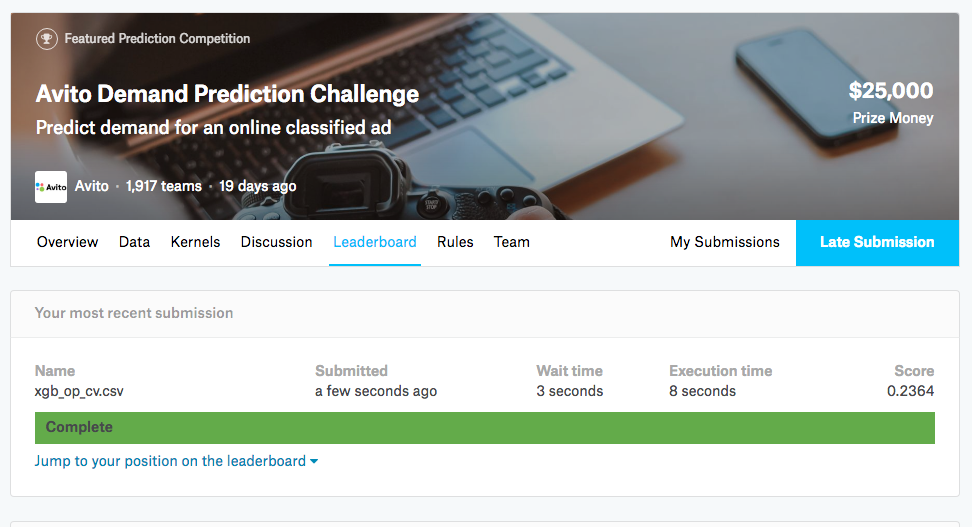

In [57]:
from IPython.display import Image
Image("./processeddata/images/XGBCV1.png")

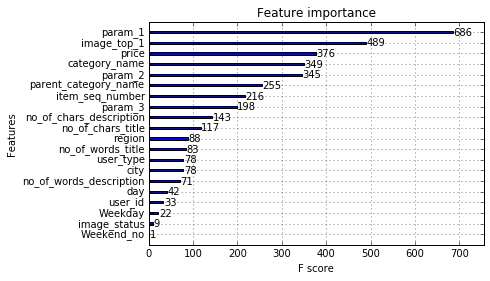

In [42]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

In [27]:
train.head()

,item_id,category_name,city,image_top_1,item_seq_number,param_1,param_2,param_3,parent_category_name,price,...,user_type,Weekday,Weekend_no,day,image_status,no_of_words_description,no_of_words_title,no_of_chars_title,no_of_chars_description,deal_probability
0,b912c3c6a6ad,42,462,12,2,249,112,1217,4,400.0,...,1,1,13,28,1,7,3,38,108,0.12789
1,2dac0150717d,22,1314,2722,19,122,112,1217,2,3000.0,...,1,6,12,26,1,7,3,32,73,0.00000
2,ba83aefab5dc,2,1290,2259,9,84,112,1217,0,4000.0,...,1,0,12,20,1,17,2,14,168,0.43177
3,02996f1dd2ea,42,950,2837,286,38,112,1217,4,2200.0,...,0,5,12,25,1,3,1,20,38,0.80323
4,7c90be56d2ab,0,318,1407,3,278,124,46,6,40000.0,...,1,3,11,16,1,4,3,17,44,0.20797


In [28]:
trainless = train.drop(['day','user_id','Weekday','image_status','Weekend_no','item_id','title'],axis=1)

In [29]:
trainless.head()

,category_name,city,image_top_1,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,user_type,no_of_words_description,no_of_words_title,no_of_chars_title,no_of_chars_description,deal_probability
0,42,462,12,2,249,112,1217,4,400.0,19,1,7,3,38,108,0.12789
1,22,1314,2722,19,122,112,1217,2,3000.0,17,1,7,3,32,73,0.00000
2,2,1290,2259,9,84,112,1217,0,4000.0,16,1,17,2,14,168,0.43177
3,42,950,2837,286,38,112,1217,4,2200.0,21,0,3,1,20,38,0.80323
4,0,318,1407,3,278,124,46,6,40000.0,4,1,4,3,17,44,0.20797


In [30]:
testless = test.drop(['day','user_id','Weekday','image_status','Weekend_no'],axis=1)
testless.head()

,category_name,city,image_top_1,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,user_type,no_of_words_description,no_of_words_title,no_of_chars_title,no_of_chars_description
0,10,318,1137,66,110,198,74,4,0.0,4,1,2,2,29,23
1,5,993,3063,4,119,112,1217,8,3000.0,19,1,10,2,31,154
2,2,151,2178,15,318,112,1217,0,15000.0,12,1,21,1,3,233
3,4,1319,3063,70,108,131,1217,2,4500.0,18,1,12,3,24,155
4,42,243,6,15,102,112,1217,4,4900.0,14,1,10,2,32,106


In [32]:
x = trainless.iloc[:,0:trainless.shape[1]-1]
y = trainless.iloc[:,-1]
#x.drop('title',axis = 1, inplace= True)
#x.drop('item_id',axis = 1, inplace= True)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
xgdmat=xgb.DMatrix(X_train,y_train)
xgdmat_test = xgb.DMatrix(X_test,y_test)

In [ ]:
num_boost_round = 80

model2 = xgb.train(
    params,
    xgdmat,
    num_boost_round=num_boost_round,
    evals=[(xgdmat_test, "Test")],
    early_stopping_rounds=10
)

In [ ]:
print("Best MAE: {:.2f} in {} rounds".format(model2.best_score, model2.best_iteration+1))
model2.save_model("my_model2_xgboost_v1.model")

In [44]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model2_xgboost_v1.model")

In [46]:
train_test = xgb.DMatrix(x)
train_output = loaded_model.predict(train_test)

In [48]:
lgboop_train = pd.DataFrame(train_output,columns=["deal_probability"],index=train.index)
lgboop_train["deal_probability"] = lgboop_train["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1
print all(i > 1.0 for i in lgboop_train.values)
print all(i < .0 for i in lgboop_train.values)
lgboop_train.to_csv("./processeddata/xgb_op_train.csv",index=True,header=True)


False
False


In [61]:
predicted_output = loaded_model.predict(xgdmat_test)

In [62]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicted_output, y_test)

0.15767297834398497

In [66]:
%%time


true_test = xgb.DMatrix(testless)
predcited_test_xgb = loaded_model.predict(true_test)


CPU times: user 8.35 s, sys: 190 ms, total: 8.54 s
Wall time: 8.66 s


In [67]:
predcited_test_xgb.shape

(508438,)

In [68]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index

In [69]:
lgboop = pd.DataFrame(predcited_test_xgb,columns=["deal_probability"],index=testdatai)

In [70]:
lgboop["deal_probability"] = lgboop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1



In [71]:
print all(i > 1.0 for i in lgboop.values)
print all(i < .0 for i in lgboop.values)

False
False


In [72]:
lgboop.to_csv("./processeddata/xgb_op_cv_1_less.csv",index=True,header=True)

In [73]:
lgboop.head()

,deal_probability
item_id,
6544e41a8817,0.110763
65b9484d670f,0.179987
8bab230b2ecd,0.254605
8e348601fefc,0.167295
8bd2fe400b89,0.273820


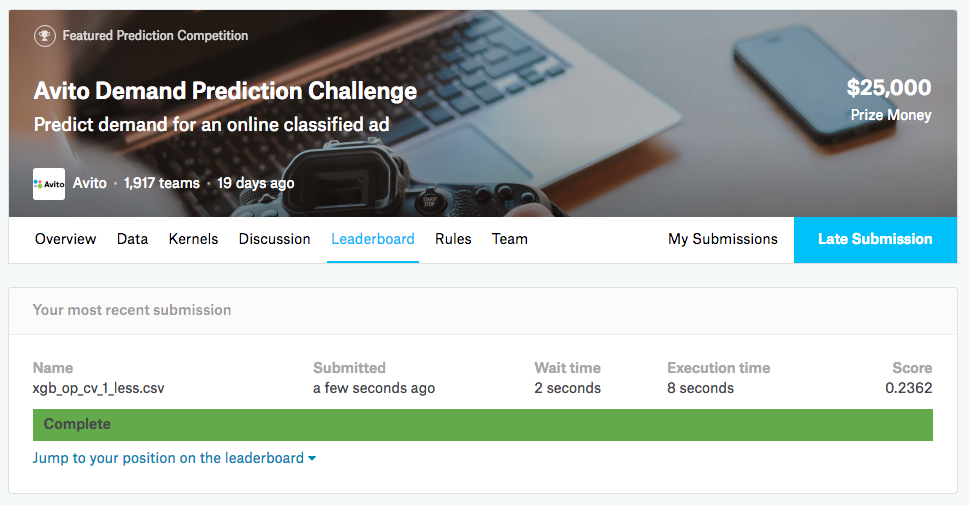

In [74]:
from IPython.display import Image
Image("./processeddata/images/XGBCV1less.png")